<a href="https://colab.research.google.com/github/marcelcerri/crescimentomicrobiano/blob/master/Batelada_Monod_Cx_e_Cs_apenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

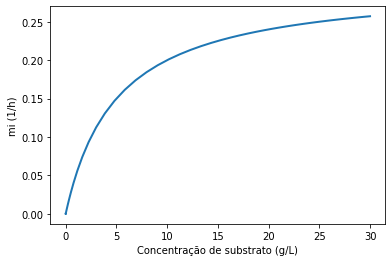

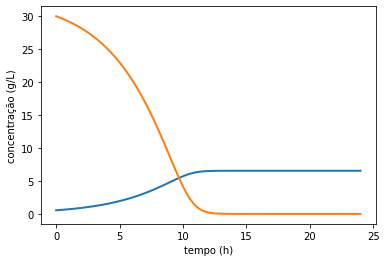

In [14]:
#importando as bibliotecas
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Entrada das variáveis para o modelo
mimax = 0.3 #unidade 1/hora - taxa específica de crescimento
ks = 5 #unidade g/L - constante de semi-saturação
Cx0 = 0.55 # unidade g/L - concentração inicial de microrganismo
Cs0 = 30 # unidade g/L - concentração inicial de substrato
tf = 24 #unidade horas - tempo final da integração
Yxs = 0.2 #unidade g células/g substrato - coeficiente estequiométrico

#Função com os balanços de massa
Concini = [Cx0,Cs0]

def crescmicrobiano (Concent, t):
    Cx, Cs = Concent
    mi = mimax*(Cs/(ks + Cs))
    dCxdt = mi * Cx
    dCsdt = - (1/Yxs)*mi*Cx
    return dCxdt,dCsdt

#Vetor tempo
t = np.linspace (0,tf,101)
#integração numérica
C = odeint(crescmicrobiano, Concini, t)

mi = mimax*(C[:,1]/(ks + C[:,1]))

plt.plot(C[:,1], mi, linewidth=2)
plt.xlabel("Concentração de substrato (g/L)")
plt.ylabel("mi (1/h)")
plt.show()

plt.plot(t, C[:,0], linewidth=2)
plt.plot(t, C[:,1], linewidth=2)
plt.xlabel("tempo (h)")
plt.ylabel("concentração (g/L)")
plt.show()
